In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['col1', 'col2']] = imputer.fit_transform(df[['col1', 'col2']])

In [2]:
data = pd.read_csv('Advertising_Data.csv')
data.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


# Data Exploration and Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [4]:
data.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


In [5]:
data.skew()

TV                      0.008834
Billboards             -0.059925
Google_Ads             -0.063041
Social_Media            0.044818
Influencer_Marketing    0.113650
Affiliate_Marketing     0.099592
Product_Sold           -0.047676
dtype: float64

In [6]:
data.isnull().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

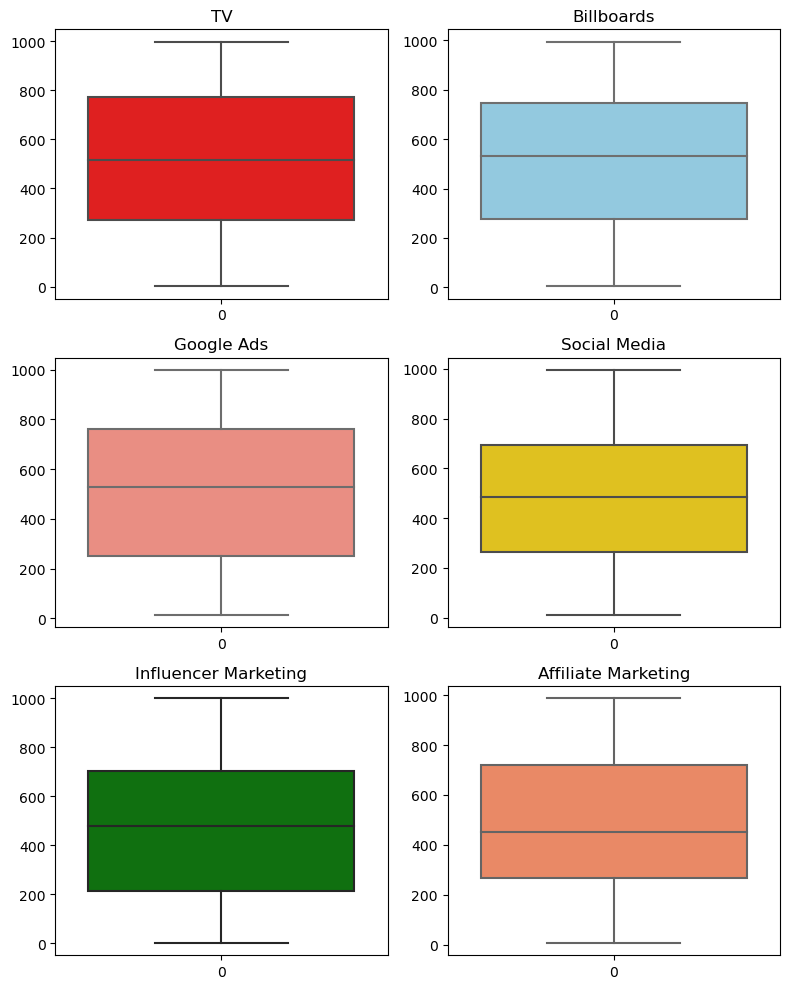

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

sns.boxplot(data=data["TV"], ax=axs[0, 0] , color = "red")
axs[0, 0].set_title("TV")

sns.boxplot(data=data["Billboards"], ax=axs[0, 1] , color="skyblue")
axs[0, 1].set_title("Billboards")

sns.boxplot(data=data["Google_Ads"], ax=axs[1, 0] , color = "salmon")
axs[1, 0].set_title("Google Ads")

sns.boxplot(data=data["Social_Media"], ax=axs[1, 1] , color = "gold")
axs[1, 1].set_title("Social Media")

sns.boxplot(data=data["Influencer_Marketing"], ax=axs[2, 0] , color = "green")
axs[2, 0].set_title("Influencer Marketing")

sns.boxplot(data=data["Affiliate_Marketing"], ax=axs[2, 1], color = "coral" )
axs[2, 1].set_title("Affiliate Marketing")

plt.tight_layout()
plt.show()

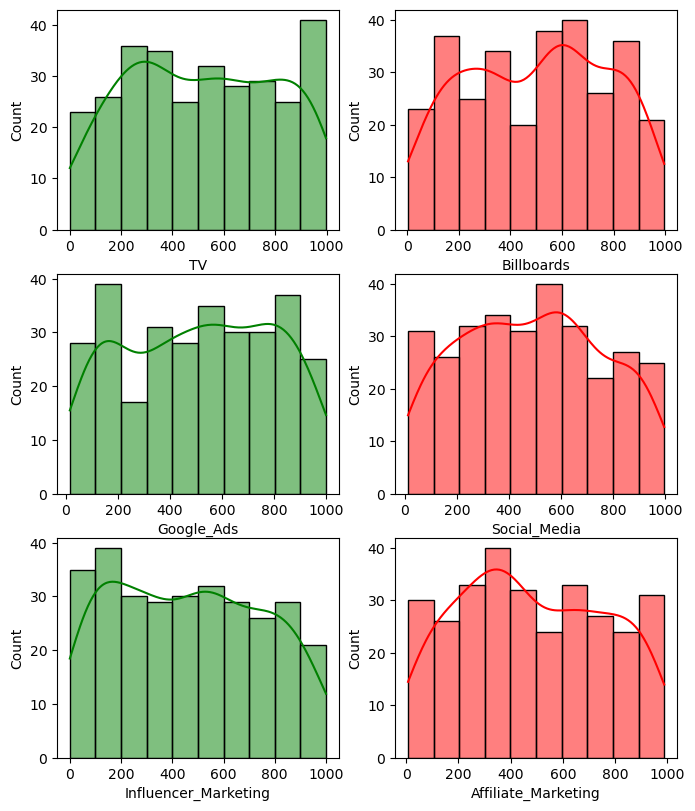

In [8]:
plt.rcParams['figure.figsize']=(8,20)

plt.subplot(6,2,1)
sns.histplot(data["TV"],kde=True , color = "g")

plt.subplot(6,2,2)
sns.histplot(data["Billboards"],kde=True , color = "r")

plt.subplot(6,2,3)
sns.histplot(data["Google_Ads"],kde=True, color = "g" )

plt.subplot(6,2,4)
sns.histplot(data["Social_Media"],kde=True , color = "r")

plt.subplot(6,2,5)
sns.histplot(data["Influencer_Marketing"],kde=True , color = "g")

plt.subplot(6,2,6)
sns.histplot(data["Affiliate_Marketing"],kde=True, color = "r")



plt.show()

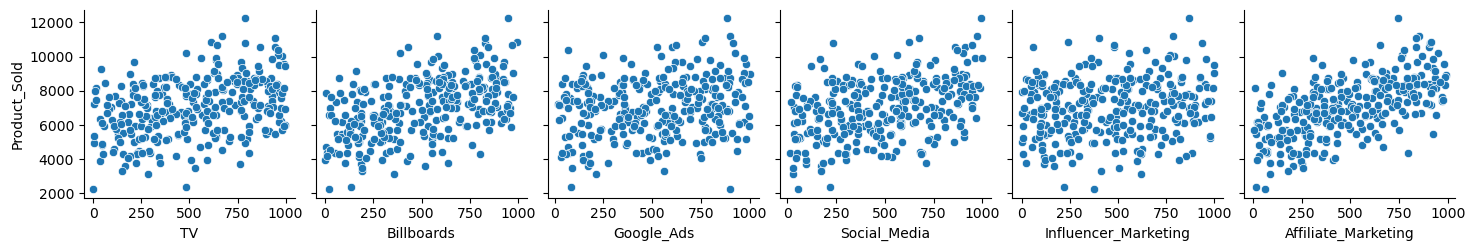

In [9]:
sns.pairplot(data,x_vars=["TV","Billboards","Google_Ads","Social_Media","Influencer_Marketing","Affiliate_Marketing"],y_vars="Product_Sold",kind="scatter")
plt.show()

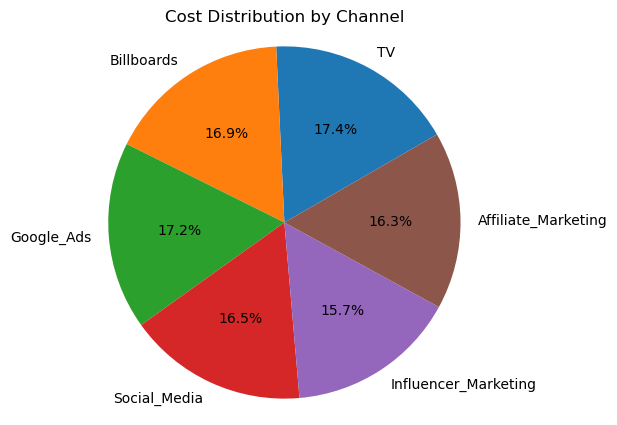

In [10]:
channels = ["TV", "Billboards", "Google_Ads", "Social_Media", "Influencer_Marketing", "Affiliate_Marketing"]

costs = [data[channel].sum() for channel in channels]

plt.figure(figsize=(5, 5))
plt.pie(costs, labels=channels, autopct='%0.1f%%',startangle=30)
plt.title('Cost Distribution by Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

# X&Y

In [11]:
X = data.drop("Product_Sold",axis=1)
Y = data["Product_Sold"]

# Identifying the best random state number

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'x' and 'y' are defined as your features and target variable, respectively

Train = []
Test = []
CV = []

for i in range(0, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    
    # Initialize and fit the Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    y_pred_train = lin_reg.predict(X_train)
    y_pred_test = lin_reg.predict(X_test)
    
    # Use metrics appropriate for regression (e.g., Mean Squared Error)
    Train.append(mean_squared_error(y_train, y_pred_train))
    Test.append(mean_squared_error(y_test, y_pred_test))
    
    # Cross-validation isn't usually used for regression problems in this way
    # You might evaluate on a separate validation set instead
    
em = pd.DataFrame({"Train": Train, "Test": Test})
best_random_no = em.idxmin(axis=0)['Test']
print("Best random number is =", best_random_no)

Best random number is = 76


# Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=76,shuffle=True) 

# Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled

array([[ 0.70947405,  0.21270458,  0.05725945,  1.45303796, -1.60666886,
        -0.12054638],
       [ 0.12188745, -1.80343844, -1.55599203, -0.67897486, -1.43472897,
         0.66073793],
       [-1.45532416,  0.26394245, -1.7284105 ,  1.13792651,  0.72113803,
        -0.35500375],
       ...,
       [ 0.0516246 ,  1.06377615, -1.12138379, -0.69967508,  1.28639605,
         1.22947544],
       [ 0.7956599 ,  1.53660982,  1.67237093, -0.95257616, -0.63502958,
        -0.12714117],
       [-0.61265663,  0.11876244,  1.08243516, -1.62774708,  0.91892622,
         1.16446451]])

# Machine Learning Modelling And Evalution


# 1.Multiple Linear Regression

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

print("Train R2:", model.score(X_train,y_train))
print("Test R2:", model.score(X_test,y_test))
print("Cross Validation Score:", cross_val_score(model,X,Y,cv=5).mean())

Intercept: 1.7138717555308176
Coefficients: [2.00175293 2.99714177 1.4987824  2.49981675 1.19934551 3.99756997]
Train R2: 0.999956807999701
Test R2: 0.9999828107051499
Cross Validation Score: 0.9999596955535814


Conclusion = out of all advertisment columns Affiliate Marketing has more importance
because it has more coefficeant value i.e sales will high from this mode of marketing , 
and sales will be low by doing google ads marketing so we can spend more money in 
affiliate marketing for more product sales. prediction with 99% .

In [16]:
model.predict([[1000,1000,1000,1000,1000,1000]]) 
#predicting on new data

array([14196.12319082])

In [17]:
model.predict([[890,350,650,230,500,150]])

array([5580.7482573])

# 2. Polynomial Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
X_poly = final_poly_converter.fit_transform(X)
X_poly = pd.DataFrame(X_poly)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
final_model = LinearRegression()
final_model.fit(X_train,y_train)

print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

ypred_train = final_model.predict(X_train)
ypred_test = final_model.predict(X_test)

print("Train R2:", final_model.score(X_train,y_train))
print("Test R2:", final_model.score(X_test,y_test))
print("Cross Validation Score:", cross_val_score(model,X,Y,cv=5).mean())

Intercept: 1.7138717555308176
Coefficients: [2.00175293 2.99714177 1.4987824  2.49981675 1.19934551 3.99756997]
Train R2: 0.999956807999701
Test R2: 0.9999828107051499
Cross Validation Score: 0.9999596955535814


In [24]:
final_model.predict([[1000,1000,1000,1000,1000,1000]])

array([14196.12319082])

# 3. Lasso Regression

In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

estimator = Lasso()

param_grid = {"alpha": [0.1, 0.2, 0.5, 0.7, 1, 10, 50, 100]}

model_hp = GridSearchCV(estimator, param_grid, cv=5, scoring="neg_mean_squared_error")
model_hp.fit(x_train, y_train)
model_hp.best_params_


{'alpha': 100}

In [28]:
lasso_best = Lasso(alpha=0.1)
lasso_best.fit(X_train,y_train)

print("Intercept:",lasso_best.intercept_)
print("Coefficients:",lasso_best.coef_)

ypred_train = lasso_best.predict(X_train)
ypred_test = lasso_best.predict(X_test)

print("Train R2:", lasso_best.score(X_train,y_train))
print("Test R2:", lasso_best.score(X_test,y_test))
print("Cross Validation Score:", cross_val_score(lasso_best,X,Y,cv=5).mean())


Intercept: 1.7215203936120815
Coefficients: [2.00176651 2.99713969 1.49877135 2.49981106 1.19934029 3.99756488]
Train R2: 0.9999568079897143
Test R2: 0.9999828042007176
Cross Validation Score: 0.9999596955684481


In [29]:
lasso_best.predict([[1000,1000,1000,1000,1000,1000]])

array([14196.11529617])